In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [79]:
def func(X, Tmax, width, cx, dx):
    rr = (X[0] - cx) ** 2 + (X[1] - dx) ** 2
    return  Tmax*np.exp(-rr/2*width**2)

In [80]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['xtick.major.width'] = 1.0
plt.rcParams['ytick.major.width'] = 1.0
plt.rcParams['axes.linewidth'] = 1.0

0 1
100 2
200 3
300 4
500 5
1000 6


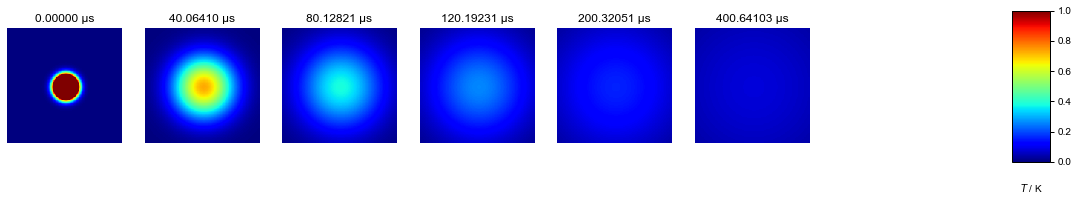

In [81]:
# plate size, µm
w = h = 100.
# intervals in x-, y- directions, µm
dx = dy = 0.5
# Thermal diffusivity of water, µm2.s-1
D = 1.56*(10**5)

Tcool = 0
Tmax = 10
width = 1

nx, ny = int(w/dx), int(h/dy)

dx2, dy2 = dx*dx, dy*dy
dt = dx2 * dy2 / (2 * D * (dx2 + dy2))

u0 = Tcool * np.ones((nx, ny))
u = u0.copy()

# 初期熱源の定義
cx, cy =  50, 50
for i in range(nx):
    for j in range(ny):
        u0[i,j] += func([i*dx, j*dy], Tmax, width, cx, cy)

def do_timestep(u0, u):
    # Propagate with forward-difference in time, central-difference in space
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * (
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy2 )

    u0 = u.copy()
    return u0, u

# Number of timesteps
nsteps = 1500
# Output 4 figures at these timesteps
mfig = [0, 100, 200, 300, 500, 1000, 1500]
three_um = []
five_um = []
ten_um = []
time = []
fignum = 0
fig = plt.figure(figsize = (18, 3))
for m in range(nsteps):
    u0, u = do_timestep(u0, u)
    time.append(m*dt*10**6)
    three_um.append(np.mean(u[97:103, 97:103]))
    five_um.append(np.mean(u[95:105, 95:105]))
    ten_um.append(np.mean(u[90:110, 90:110]))
    if m in mfig:
        fignum += 1
        print(m, fignum)
        ax = fig.add_subplot(170 + fignum)
        im = ax.imshow(u.copy()[80:120, 80:120], cmap='jet', vmin=Tcool,vmax = Tmax*0.1)
        ax.set_axis_off()
        ax.set_title('{:.5f} µs'.format(m*dt*10**6))
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('$T$ / K', labelpad=20)
fig.colorbar(im, cax=cbar_ax)

#pdfのセーブ
pp = PdfPages('../Program/Uneditied_figure/FigS10.pdf')
pp.savefig(fig)
pp.close()

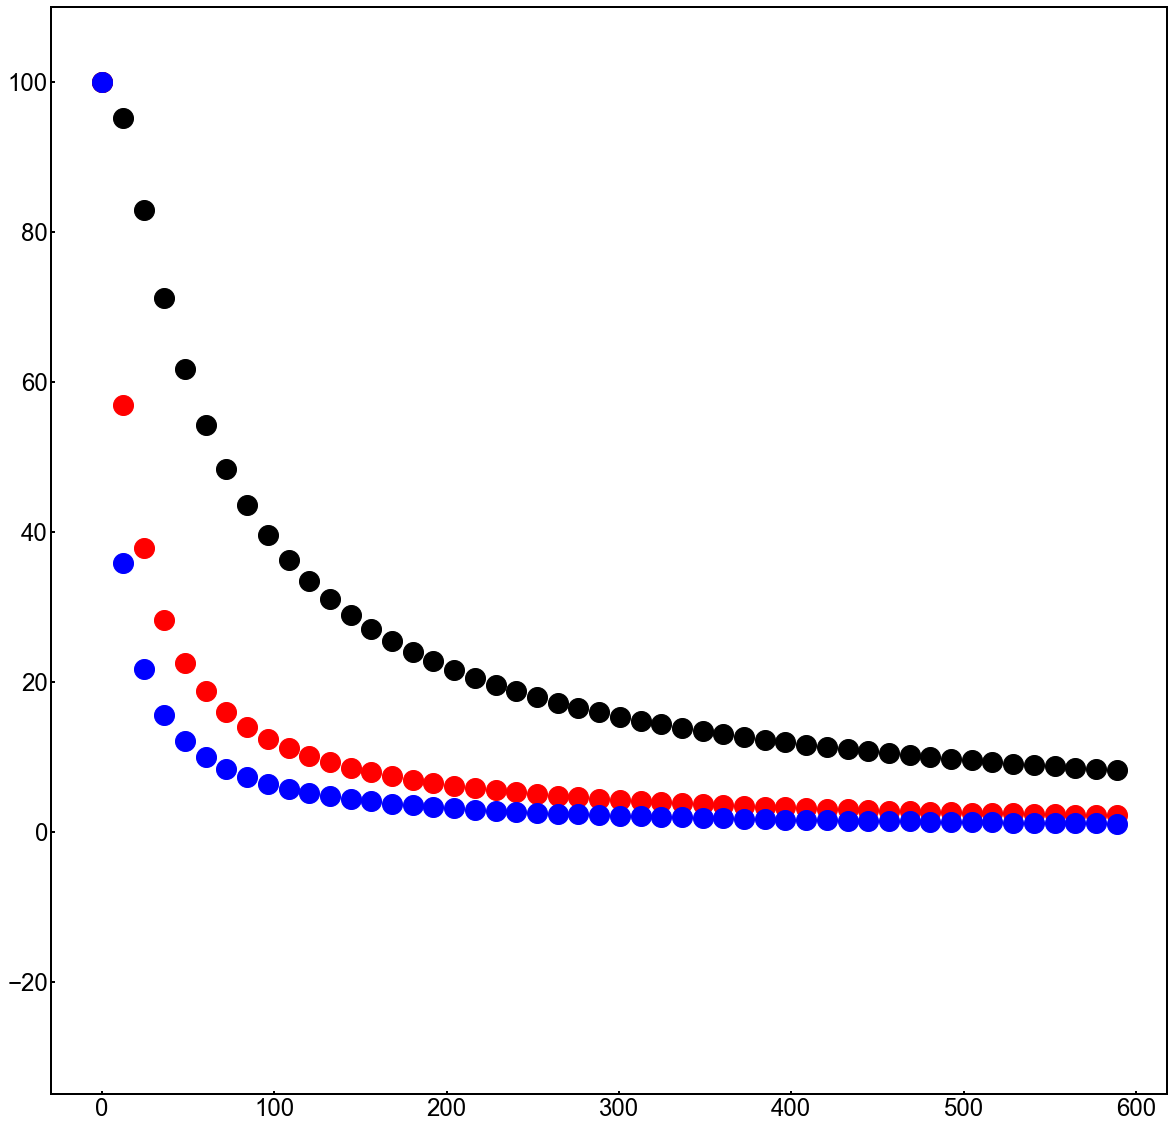

In [87]:
fig = plt.figure(figsize=(20, 20))
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.width'] = 2.0
plt.rcParams['axes.linewidth'] = 2.0
plt.tick_params(axis='both', direction = "in", labelsize = 24)

plt.plot(time[::30], ten_um[::30]/ten_um[0]*100, color = 'Black', marker = 'o', markersize = 20, linewidth = 0)
plt.plot(time[::30], five_um[::30]/five_um[0]*100, color = 'red', marker = 'o', markersize = 20, linewidth = 0)
plt.plot(time[::30], three_um[::30]/three_um[0]*100, color = 'Blue', marker = 'o', markersize = 20, linewidth = 0)
plt.ylim(-35, 110)

#pdfのセーブ
pp = PdfPages('../Program/Uneditied_figure/Fig4d_simulation.pdf')
pp.savefig(fig)
pp.close()

plt.show()

In [83]:
ten_AUC = sum(ten_um[::30][2:]/ten_um[0])*(30*dt*10**6)
five_AUC = sum(five_um[::30][2:]/five_um[0])*(30*dt*10**6)
three_AUC = sum(three_um[::30][2:]/three_um[0])*(30*dt*10**6)

In [84]:
print(ten_AUC)
print(five_AUC)
print(three_AUC)

126.9885815495488
40.352801843321956
21.068685276753385
